In [2]:
#!/usr/bin/env python
import sys,os
#print sys.path
sys.path=["/home/Zhi/QA-sim","/home/Zhi/april/py"]+sys.path
print(sys.path)
from Parameter import Parameter
from BaseLikelihood import BaseLikelihood
import MCMCAnalyzer
import numpy as np
import quasim as qua
import math
import matplotlib.pyplot as plt
import corner
from uncertainties import ufloat
from uncertainties.umath import sqrt
import matplotlib.cm as cm

['/home/Zhi/QA-sim', '/home/Zhi/april/py', '/home/Zhi/QA-sim/notebook', '/usr/lib64/python39.zip', '/usr/lib64/python3.9', '/usr/lib64/python3.9/lib-dynload', '', '/home/Zhi/.local/lib/python3.9/site-packages', '/usr/lib64/python3.9/site-packages', '/usr/lib/python3.9/site-packages', '/usr/lib/python3.9/site-packages/IPython/extensions', '/home/Zhi/.ipython']


In [3]:
# Create Input data
# Create star pair position placed in the E-W direction. Dec=0

QT = qua.QuaTel(DL=np.pi)
BSC = qua.BSC_process("/home/Zhi/QA-sim/bsc5.dat")

lam = 1*10**(-6)
#NEW YORK COORD but the overall baseline is E-W, with B ~ 190m for RA2 = -1.30004
# Change to B~400M for RA2= -1.300085
pos_t_NY = [[-1.3,0.71,6.4*10**(6)],[-1.300085,0.71,6.4*10**(6)]]   #Baseline vector in [RA,DEC,RADIUS] -1.30004
pos = np.array([[0,1.2,0.0,450.0],[0,1.202,0.0,90.0]])

pos = BSC.BSC_filter(pos_t_NY,1)

pos[np.argmax(np.average(pos[:,:,3],axis=1))]

array([[4.05800000e+03, 2.70515853e+00, 3.46283020e-01, 1.09926243e+02],
       [4.05700000e+03, 2.70513671e+00, 3.46302412e-01, 3.28928408e+02]])

In [15]:
for i in range(12):
    pairs = BSC.BSC_filter(pos_t_NY,i+1)  # loop over 12 months
    print(i+1)
    if pairs.size == 0:   # check if we have empty pair
        print("No pairs found")
        break
    
    # find the pair that has the maximum avg flux
    maxFlux = (pairs[np.argmax(np.average(pairs[:,:,3],axis=1))]).reshape(1,2,4)   
    if i ==0:
        idealPairs = maxFlux
        
    else:# find ideal pairs for 12 months
        idealPairs = np.concatenate((idealPairs,maxFlux),axis=0)
print(idealPairs)

1
2
3
4
5
6
7
8
9
10
11
12
[[[4.05800000e+03 2.70515853e+00 3.46283020e-01 1.09926243e+02]
  [4.05700000e+03 2.70513671e+00 3.46302412e-01 3.28928408e+02]]

 [[4.05800000e+03 2.70515853e+00 3.46283020e-01 1.09926243e+02]
  [4.05700000e+03 2.70513671e+00 3.46302412e-01 3.28928408e+02]]

 [[5.05500000e+03 3.50785000e+00 9.58563914e-01 9.57417549e+01]
  [5.05400000e+03 3.50778455e+00 9.58626940e-01 4.49884866e+02]]

 [[5.50600000e+03 3.86148279e+00 4.72533351e-01 3.02762013e+02]
  [5.50500000e+03 3.86148279e+00 4.72547895e-01 3.25912775e+01]]

 [[7.14200000e+03 4.95779682e+00 7.33377655e-02 3.70767265e+01]
  [7.14100000e+03 4.95769501e+00 7.33668544e-02 5.16536938e+01]]

 [[7.95600000e+03 5.44184934e+00 5.99942386e-01 3.91833338e+01]
  [7.94900000e+03 5.43762419e+00 5.92893195e-01 3.77660343e+02]]

 [[7.95600000e+03 5.44184934e+00 5.99942386e-01 3.91833338e+01]
  [7.94900000e+03 5.43762419e+00 5.92893195e-01 3.77660343e+02]]

 [[8.76600000e+03 6.03275238e+00 7.46264003e-01 3.31971946e+01]

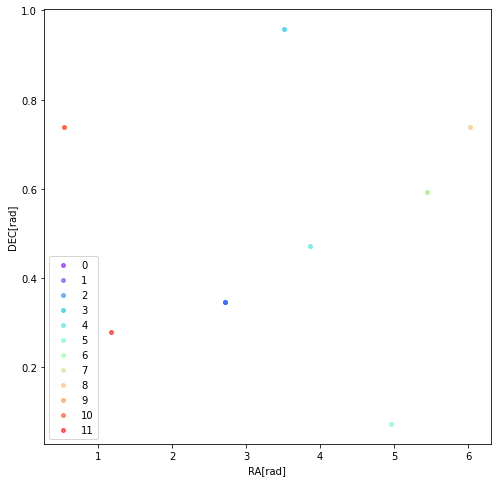

In [35]:
L = 12
colors = cm.rainbow(np.linspace(0,1,L))
fig = plt.figure(figsize=(8,8))
for i in range(L):
    plt.scatter(idealPairs[i,1,1],idealPairs[i,1,2],alpha = 0.6, color=colors[i],s=15,label=i)
plt.xlabel('RA[rad]');plt.ylabel('DEC[rad]')
plt.legend()
plt.show()

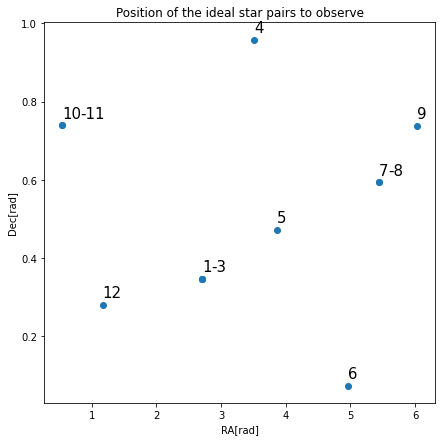

In [56]:
n = np.arange(12)
plt.figure(figsize=(7,7))
#plt.ylim([-0.001,0.014])
plt.scatter(idealPairs[:,1,1],idealPairs[:,1,2])

for i, label in enumerate(n):
    if np.logical_and(idealPairs[i-1,1,1] == idealPairs[i,1,1],idealPairs[i-1,1,2] == idealPairs[i,1,2]):
        pass
    else:
        plt.annotate(label, (idealPairs[i,1,1],idealPairs[i,1,2]+0.02), size=15)
plt.annotate("-3",(idealPairs[0,1,1]+0.15,idealPairs[0,1,2]+0.02), size=15)
plt.annotate("-8",(idealPairs[6,1,1]+0.15,idealPairs[6,1,2]+0.02), size=15)  
plt.annotate("-11",(idealPairs[9,1,1]+0.28,idealPairs[9,1,2]+0.02), size=15)       
plt.xlabel("RA[rad]");plt.ylabel("Dec[rad]")
plt.title("Position of the ideal star pairs to observe")
plt.show()